In [1]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import re

In [2]:
cwd = os.getcwd()
up_two_folders = os.path.join(cwd, os.pardir, os.pardir)
normalized_path = os.path.normpath(up_two_folders)
os.chdir(normalized_path)

In [3]:
#Read the file with all CS data for various student groups over years 2021-22 combined
df = pd.read_excel("data/CS_data_21_22.xlsx")
df

,District Name,District Code,K,1,2,3,4,5,6,7,8,9,10,11,12,All Grades,Total Students,Student Group,Year
0,Abby Kelley Foster Charter Public (District),4450000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,293,Hispanic/Latino,2022
1,Abington,10000,0,0,0,0,0,0,0,0,0,0,0,1,0,1,281,Hispanic/Latino,2022
2,Academy Of the Pacific Rim Charter Public (Dis...,4120000,0,0,0,0,0,0,0,0,0,0,0,4,4,8,144,Hispanic/Latino,2022
3,Acton-Boxborough,6000000,0,0,0,0,0,0,0,0,0,1,0,0,2,3,379,Hispanic/Latino,2022
4,Acushnet,30000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,Hispanic/Latino,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,Woburn,3470000,0,0,0,0,0,0,0,0,0,9,4,7,26,46,4177,All Students,2021
9652,Worcester,3480000,0,0,0,0,0,0,0,0,0,34,103,88,118,343,20249,All Students,2021
9653,Worthington,3490000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,All Students,2021
9654,Wrentham,3500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,835,All Students,2021


In [7]:
df_finance = pd.read_excel("data/NetSchoolSpending.xlsx")
df_finance

,District Name,District Code,Required NSS,Actual NSS,Amount Over or Under Required,Actual NSS as % of Required,Foundation Budget,Public Actual NSS as % of Foundation
0,Abington,10000,"$23,397,595.00","$29,107,620.00","$5,710,025.00",124,"$23,388,477.00",124
1,Acton-Boxborough,6000000,"$60,270,448.00","$80,959,410.00","$20,688,962.00",134,"$57,507,919.00",141
2,Acushnet,30000,"$13,860,093.00","$15,453,765.00","$1,593,672.00",111,"$13,443,441.00",115
3,Agawam,50000,"$42,428,623.00","$61,004,297.00","$18,575,674.00",144,"$42,227,451.00",144
4,Amesbury,70000,"$24,812,747.00","$34,017,108.00","$9,204,361.00",137,"$22,996,253.00",148
...,...,...,...,...,...,...,...,...
314,Woburn,3470000,"$53,841,306.00","$80,343,622.00","$26,502,316.00",149,"$53,841,306.00",149
315,Worcester,3480000,"$379,530,589.00","$382,847,422.00","$3,316,833.00",101,"$379,530,589.00",101
316,Worthington,3490000,"$1,215,545.00","$1,590,377.00","$374,832.00",131,"$1,201,025.00",132
317,Wrentham,3500000,"$11,383,632.00","$14,985,940.00","$3,602,308.00",132,"$9,200,581.00",163


In [14]:
df_finance = df_finance[df_finance['District Name']!='State Totals']

In [15]:
df = df[df['District Name']!='State Totals']

#Create a dataframe with all districts the data is available and map them with towns in the polygon shape file
df_district = pd.DataFrame({'District Name':list(df['District Name'].unique())})

In [19]:
df_district['CS Participation %'] = df_district['District Name'].apply(lambda x:
                                                                      df['All Grades'][df['District Name']==x].sum()*100/df['Total Students'][df['District Name']==x].sum())

In [25]:
for i in df['Student Group'].unique():
    df_district['CS Participation_'+i] = df_district['District Name'].apply(lambda x:
  df['All Grades'][(df['District Name']==x)&(df['Student Group']==i)].sum()*100/df['Total Students'][(df['District Name']==x)&(df['Student Group']==i)].sum())                                                                         

In [44]:
df_district['Total Students'] = df_district['District Name'].apply(lambda x: df['Total Students'][df['District Name']==x].sum())
df_district['All Grades'] = df_district['District Name'].apply(lambda x: df['All Grades'][df['District Name']==x].sum())

In [52]:
df_district_finance = df_district.merge(df_finance, how = 'inner', on ='District Name' )

In [53]:
df_district_finance

,District Name,CS Participation %,CS Participation_Hispanic/Latino,CS Participation_English Learner,CS Participation_Nat. Haw. or Pacif. Isl.,CS Participation_Male,CS Participation_Low Income,CS Participation_Amer. Ind. or Alaska Nat.,CS Participation_Afr. Amer./Black,CS Participation_Asian,...,CS Participation_Students w/disabilities,Total Students,All Grades,District Code,Required NSS,Actual NSS,Amount Over or Under Required,Actual NSS as % of Required,Foundation Budget,Public Actual NSS as % of Foundation
0,Abington,0.944606,0.571429,0.000000,0.0,1.799242,0.320718,0.0,0.934579,5.102041,...,0.147710,17150,162,10000,"$23,397,595.00","$29,107,620.00","$5,710,025.00",124,"$23,388,477.00",124
1,Acton-Boxborough,1.413243,0.421941,0.182149,0.0,2.335656,0.453721,0.0,0.316456,3.194888,...,0.599600,36441,515,6000000,"$60,270,448.00","$80,959,410.00","$20,688,962.00",134,"$57,507,919.00",141
2,Acushnet,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,6798,0,30000,"$13,860,093.00","$15,453,765.00","$1,593,672.00",111,"$13,443,441.00",115
3,Agawam,2.465232,1.195219,0.857143,0.0,4.094077,2.032086,0.0,1.315789,4.347826,...,1.888342,27827,686,50000,"$42,428,623.00","$61,004,297.00","$18,575,674.00",144,"$42,227,451.00",144
4,Amesbury,6.565902,5.142857,1.282051,0.0,9.916055,4.781533,0.0,12.500000,16.279070,...,3.488372,14423,947,70000,"$24,812,747.00","$34,017,108.00","$9,204,361.00",137,"$22,996,253.00",148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,Worcester,1.472661,1.149366,0.676247,0.0,2.343785,1.342196,0.0,1.972603,3.539823,...,0.927077,217769,3207,3480000,"$379,530,589.00","$382,847,422.00","$3,316,833.00",101,"$379,530,589.00",101
314,Worthington,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.0,NaN,NaN,...,0.000000,473,0,3490000,"$1,215,545.00","$1,590,377.00","$374,832.00",131,"$1,201,025.00",132
315,Wrentham,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,6177,0,3500000,"$11,383,632.00","$14,985,940.00","$3,602,308.00",132,"$9,200,581.00",163
316,Southern Worcester County Regional Vocational ...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,4451,0,8760000,"$19,639,791.00","$19,609,870.00","-$29,921.00",100,"$19,584,276.00",100


In [54]:
df_district_finance['Required NSS'] = df_district_finance['Required NSS'].apply(lambda x:float(re.sub(r'[^\d.]', '', x)))
df_district_finance['Actual NSS'] = df_district_finance['Actual NSS'].apply(lambda x:float(re.sub(r'[^\d.]', '', x)))
df_district_finance['Amount Over or Under Required'] = df_district_finance['Amount Over or Under Required'].apply(lambda x:float(re.sub(r'[^\d.]', '', x)))
df_district_finance['Foundation Budget'] = df_district_finance['Foundation Budget'].apply(lambda x:float(re.sub(r'[^\d.]', '', x)))

In [55]:
df_district_finance['Required NSS per Student'] = df_district_finance['Required NSS']/df_district_finance['Total Students']
df_district_finance['Actual NSS per Student'] = df_district_finance['Required NSS']/df_district_finance['Total Students']

In [62]:
df_teacher = pd.read_excel("data/TeacherSalaries.xlsx")
df_teacher

,District Name,District Code,Salary Totals,Average Salary,FTE Count
0,Abby Kelley Foster Charter Public (District),4450000,"$7,586,419","$66,422",114.2
1,Abington,10000,"$12,181,431","$92,005",132.4
2,Academy Of the Pacific Rim Charter Public (Dis...,4120000,"$3,503,450","$67,505",51.9
3,Acton-Boxborough,6000000,"$36,991,103","$91,268",405.3
4,Acushnet,30000,"$5,221,793","$76,566",68.2
...,...,...,...,...,...
391,Woburn,3470000,"$32,234,181","$89,168",361.5
392,Worcester,3480000,"$171,799,156","$93,339","1,840.6"
393,Worthington,3490000,"$322,221","$43,543",7.4
394,Wrentham,3500000,"$6,481,188","$87,348",74.2


In [63]:
df_teacher['Average Salary'] = df_teacher['Average Salary'].apply(lambda x:float(re.sub(r'[^\d.]', '', x)))

In [64]:
df_district_finance_teacher = df_district_finance.merge(df_teacher, how = 'inner', on = 'District Name')

In [68]:
df_district_finance_teacher['FTE Count'] = df_district_finance_teacher['FTE Count'].apply(lambda x: float(x.replace(',', '').strip()))

In [69]:
df_district_finance_teacher['FTE Count per Student'] = df_district_finance_teacher['FTE Count']/df_district_finance_teacher['Total Students']

In [71]:
df_district_finance_teacher

,District Name,CS Participation %,CS Participation_Hispanic/Latino,CS Participation_English Learner,CS Participation_Nat. Haw. or Pacif. Isl.,CS Participation_Male,CS Participation_Low Income,CS Participation_Amer. Ind. or Alaska Nat.,CS Participation_Afr. Amer./Black,CS Participation_Asian,...,Actual NSS as % of Required,Foundation Budget,Public Actual NSS as % of Foundation,Required NSS per Student,Actual NSS per Student,District Code_y,Salary Totals,Average Salary,FTE Count,FTE Count per Student
0,Abington,0.944606,0.571429,0.000000,0.0,1.799242,0.320718,0.0,0.934579,5.102041,...,124,23388477.0,124,1364.291254,1364.291254,10000,"$12,181,431",92005.0,132.4,0.007720
1,Acton-Boxborough,1.413243,0.421941,0.182149,0.0,2.335656,0.453721,0.0,0.316456,3.194888,...,134,57507919.0,141,1653.918608,1653.918608,6000000,"$36,991,103",91268.0,405.3,0.011122
2,Acushnet,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000,...,111,13443441.0,115,2038.848632,2038.848632,30000,"$5,221,793",76566.0,68.2,0.010032
3,Agawam,2.465232,1.195219,0.857143,0.0,4.094077,2.032086,0.0,1.315789,4.347826,...,144,42227451.0,144,1524.728609,1524.728609,50000,"$26,272,816",85887.0,305.9,0.010993
4,Amesbury,6.565902,5.142857,1.282051,0.0,9.916055,4.781533,0.0,12.500000,16.279070,...,137,22996253.0,148,1720.359634,1720.359634,70000,"$13,799,456",86626.0,159.3,0.011045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,Worcester,1.472661,1.149366,0.676247,0.0,2.343785,1.342196,0.0,1.972603,3.539823,...,101,379530589.0,101,1742.812747,1742.812747,3480000,"$171,799,156",93339.0,1840.6,0.008452
313,Worthington,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.0,NaN,NaN,...,131,1201025.0,132,2569.862579,2569.862579,3490000,"$322,221",43543.0,7.4,0.015645
314,Wrentham,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,132,9200581.0,163,1842.906265,1842.906265,3500000,"$6,481,188",87348.0,74.2,0.012012
315,Southern Worcester County Regional Vocational ...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.0,0.000000,0.000000,...,100,19584276.0,100,4412.444619,4412.444619,8760000,"$9,480,713",86032.0,110.2,0.024758


In [89]:
df_district_finance_teacher['Total Students'][df_district_finance_teacher['CS Participation %']<=0].mean()

3659.385714285714

In [90]:
df_district_finance_teacher['Total Students'].mean()

22313.637223974765

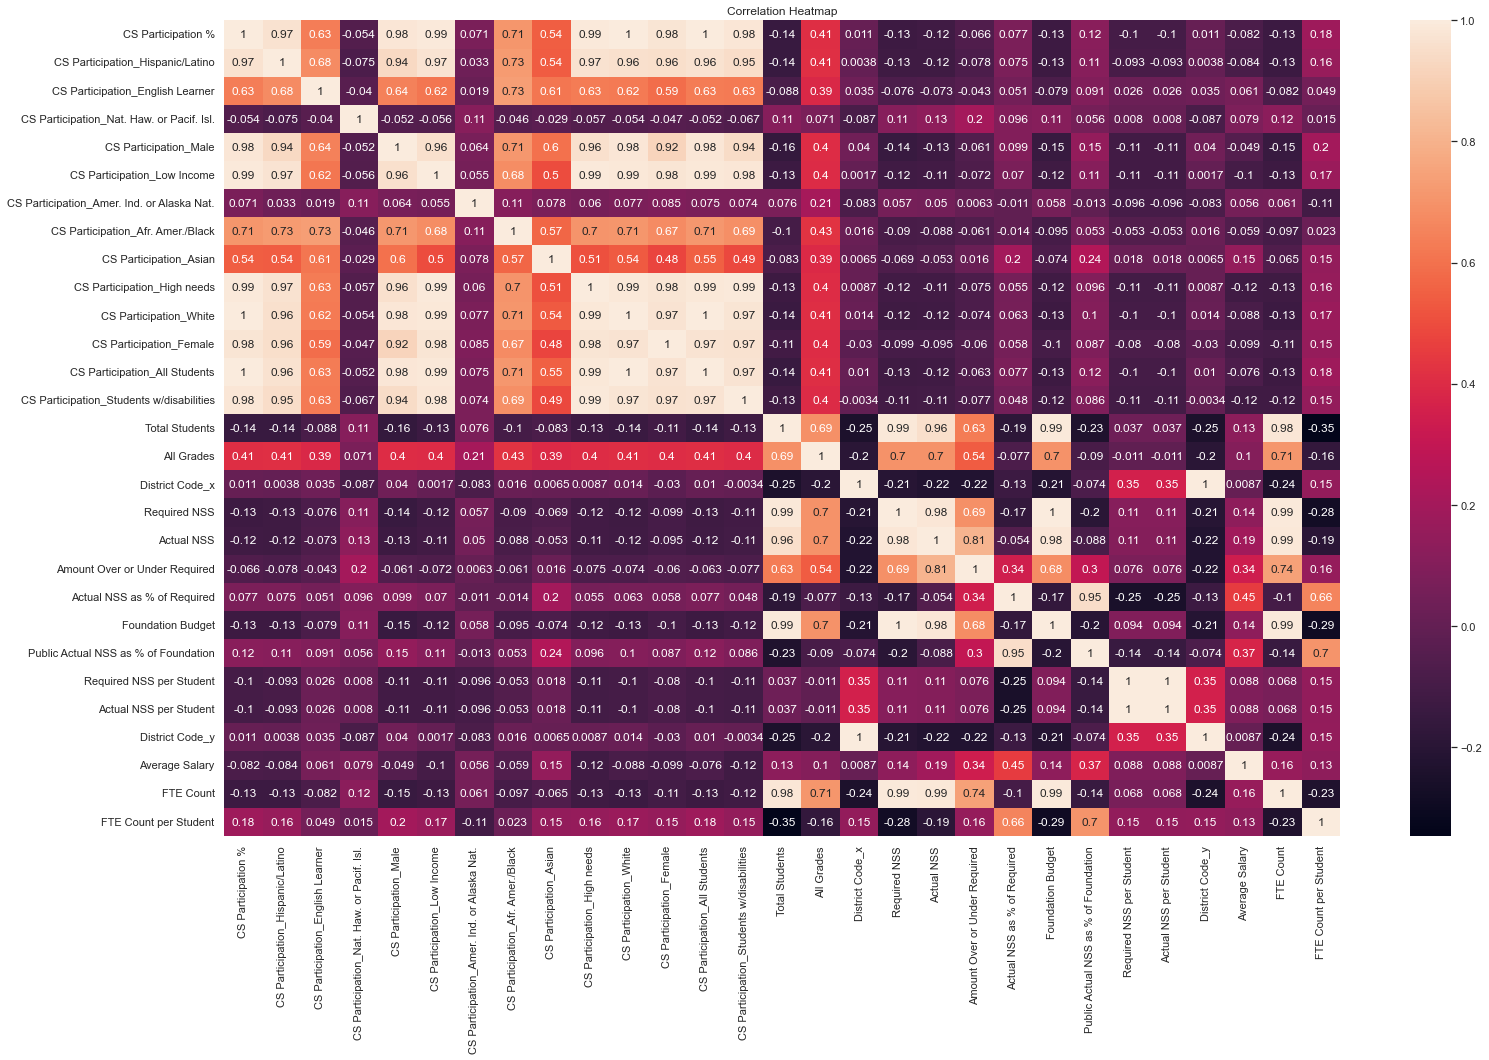

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = df_district_finance_teacher[df_district_finance_teacher['CS Participation %']>0].corr()

# Creating a heatmap using seaborn
plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [81]:
dffx = df_district_finance_teacher.sort_values(by = 'CS Participation %', ascending=False).reset_index(drop = True)[:50]

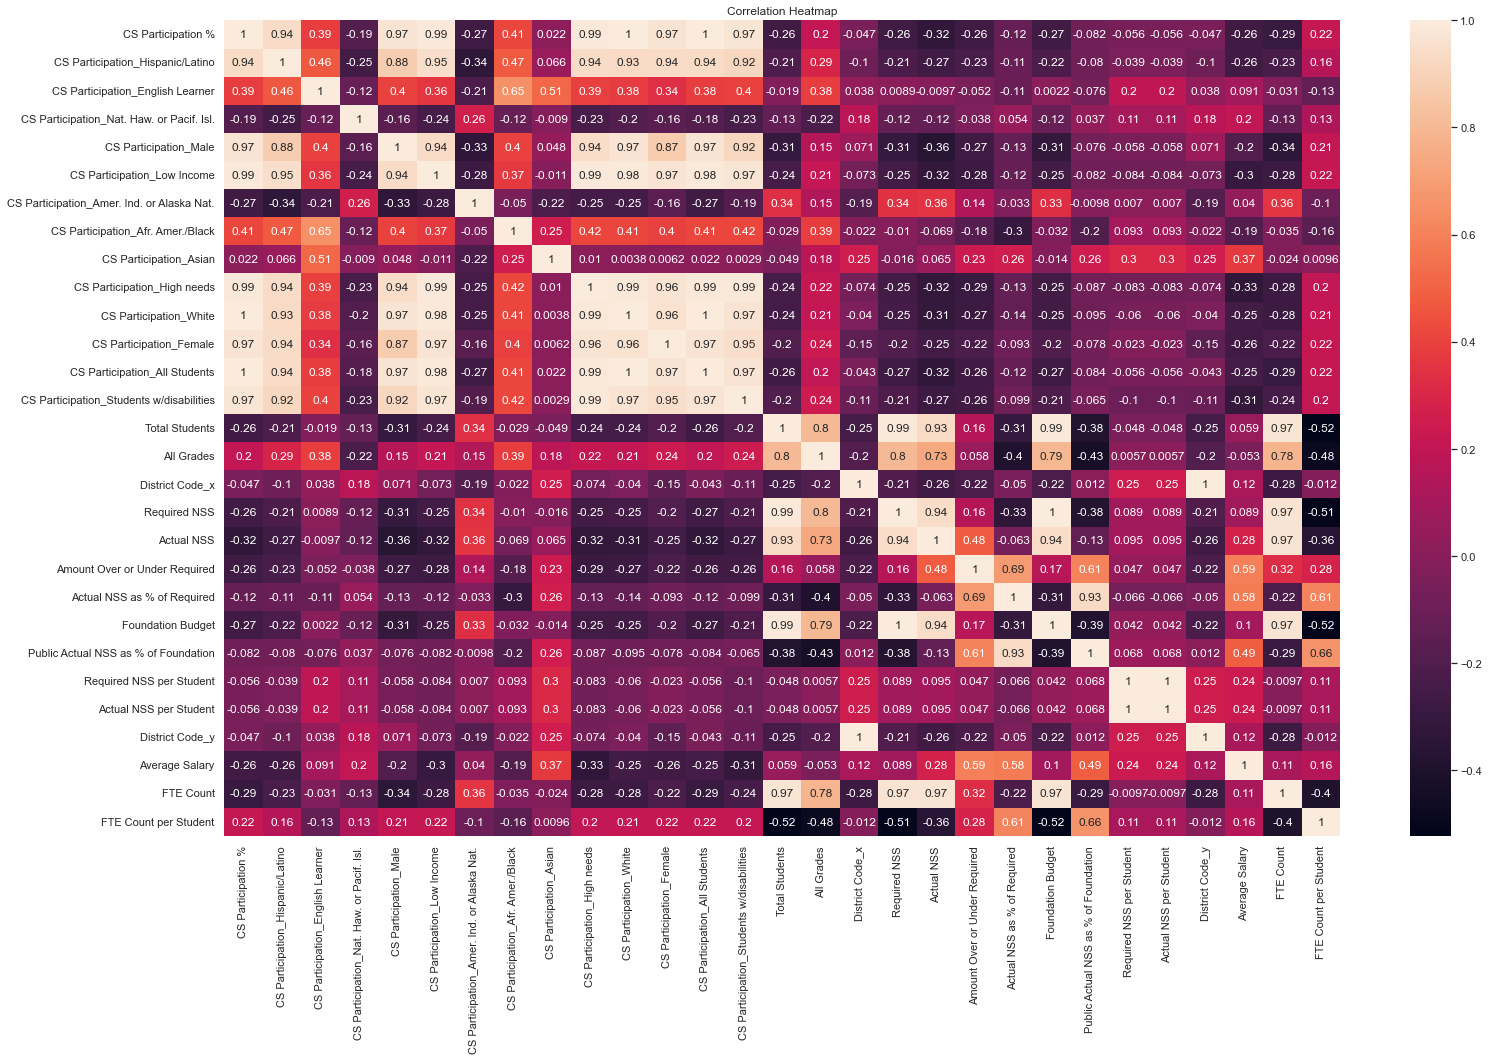

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr1 = dffx.corr()

# Creating a heatmap using seaborn
plt.figure(figsize=(25, 15))
sns.heatmap(corr1, annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [85]:
dffy = df_district_finance_teacher[df_district_finance_teacher['CS Participation %']>0].sort_values(by = 'CS Participation %', ascending=True).reset_index(drop = True)[:50]

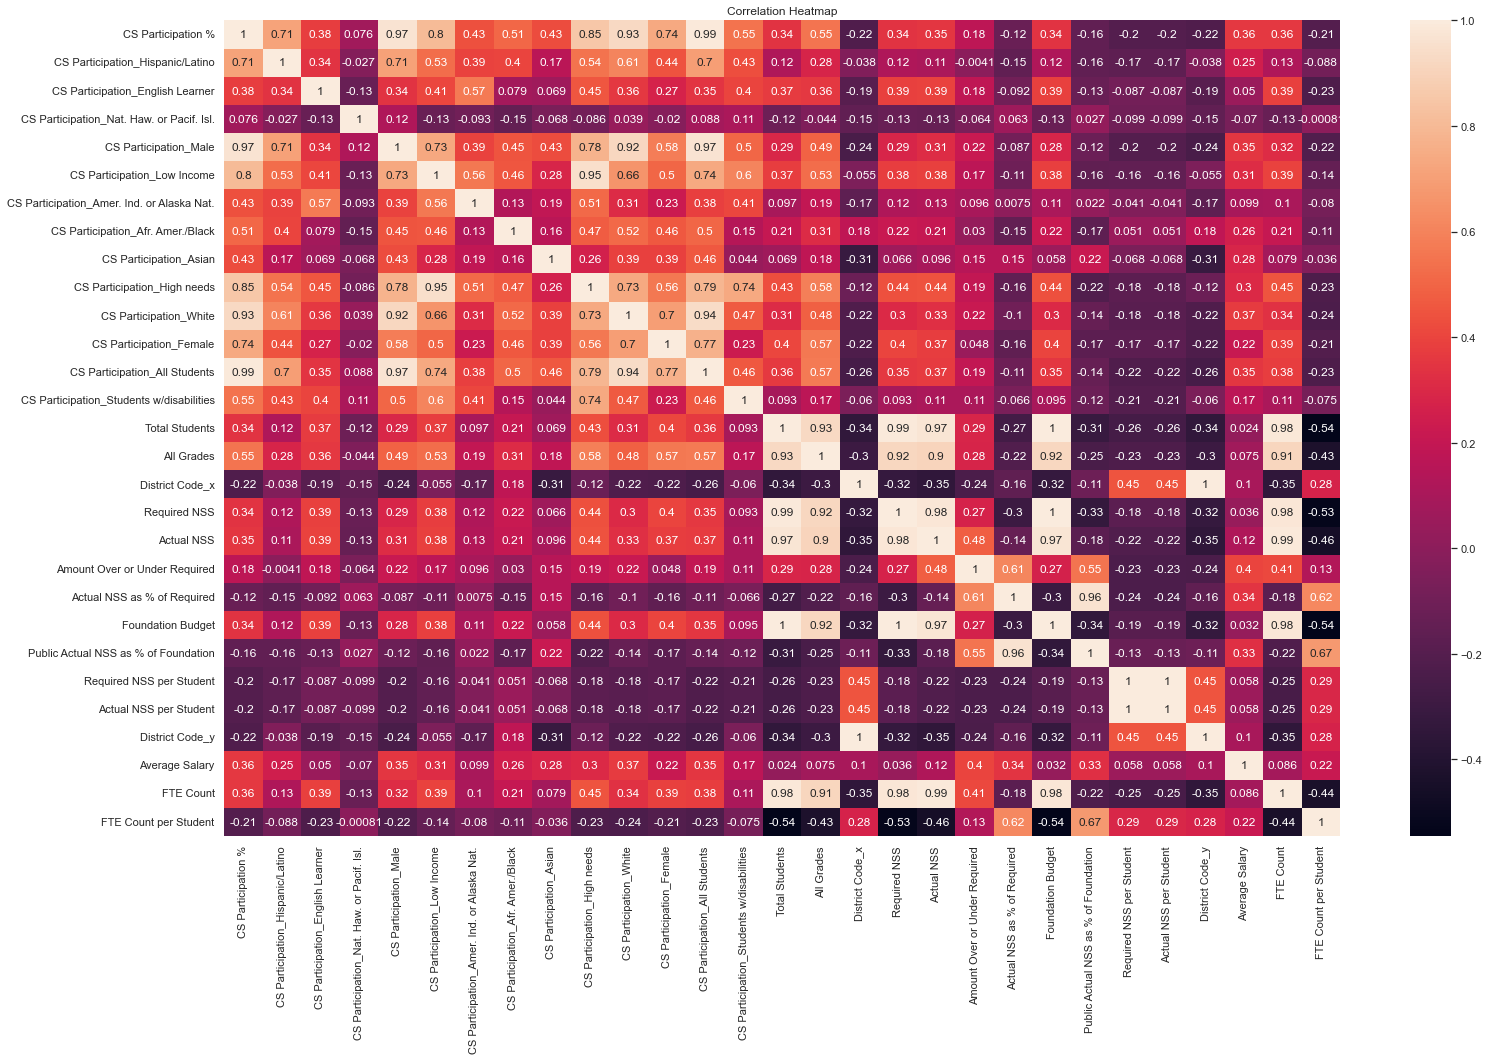

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr2 = dffy.corr()

# Creating a heatmap using seaborn
plt.figure(figsize=(25, 15))
sns.heatmap(corr2, annot=True)
plt.title("Correlation Heatmap")
plt.show()


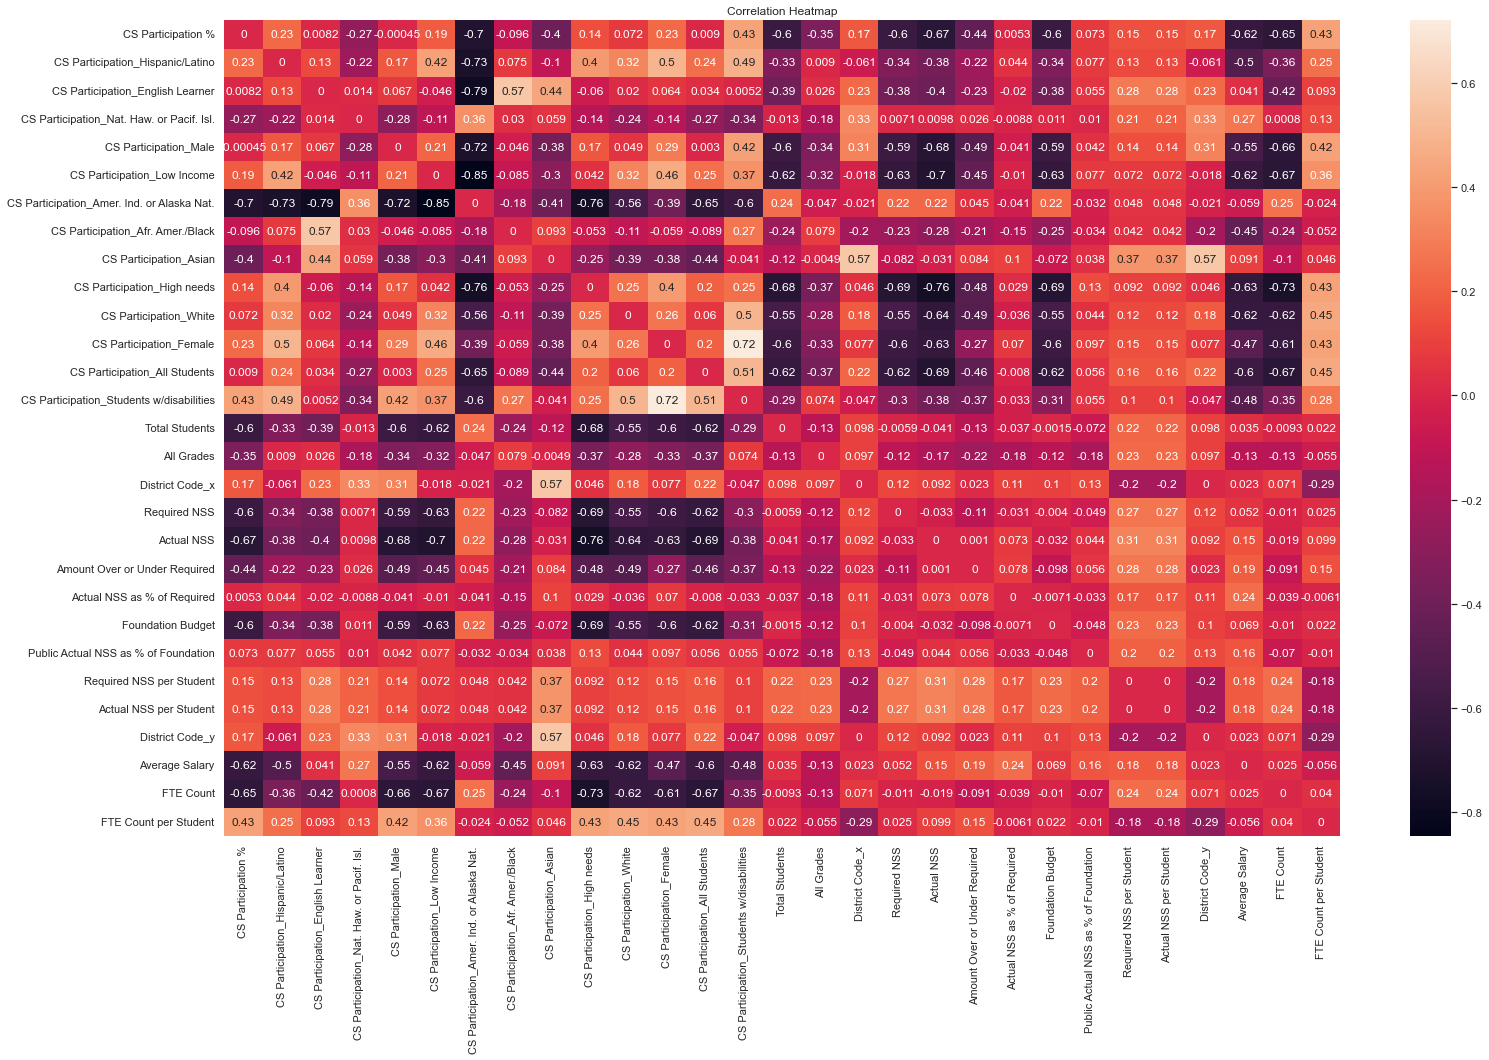

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr2 = dffy.corr()

# Creating a heatmap using seaborn
plt.figure(figsize=(25, 15))
sns.heatmap(corr1-corr2, annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [107]:
t50 = pd.DataFrame(dffx.mean(), columns=['Top_50_mean'])
b50 = pd.DataFrame(dffy.mean(), columns=['Bottom_50_mean'])
o = pd.DataFrame(df_district_finance_teacher[df_district_finance_teacher['CS Participation %']<=0].mean(), columns=['Bottom_50_mean'])

/var/folders/zy/2k3gqchn0xlg6m2_1yr164pm0000gn/T/ipykernel_80312/1589871155.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  t50 = pd.DataFrame(dffx.mean(), columns=['Top_50_mean'])
/var/folders/zy/2k3gqchn0xlg6m2_1yr164pm0000gn/T/ipykernel_80312/1589871155.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  b50 = pd.DataFrame(dffy.mean(), columns=['Bottom_50_mean'])
/var/folders/zy/2k3gqchn0xlg6m2_1yr164pm0000gn/T/ipykernel_80312/1589871155.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the re

In [108]:
t50['Top_50_mean'] = t50['Top_50_mean'].apply(lambda x: round(x,2))
t50['Bottom_50_mean'] = b50['Bottom_50_mean']
t50['Bottom_50_mean'] = t50['Bottom_50_mean'].apply(lambda x: round(x,2))
t50['Zero_Participation_mean'] = o['Bottom_50_mean']
t50['Zero_Participation_mean'] = t50['Zero_Participation_mean'].apply(lambda x: round(x,2))
t50

,Top_50_mean,Bottom_50_mean,Zero_Participation_mean
CS Participation %,15.10,0.73,0.00
CS Participation_Hispanic/Latino,14.05,0.55,0.00
CS Participation_English Learner,7.79,0.17,0.00
CS Participation_Nat. Haw. or Pacif. Isl.,0.39,0.51,0.00
CS Participation_Male,17.93,1.22,0.00
CS Participation_Low Income,14.88,0.58,0.00
CS Participation_Amer. Ind. or Alaska Nat.,3.46,1.57,0.00
CS Participation_Afr. Amer./Black,13.85,0.69,0.00
CS Participation_Asian,14.73,2.04,0.00
CS Participation_High needs,14.16,0.54,0.00


In [ ]:
t50 = t50

In [10]:
#Read the Massachusetts polygon shape file
df_polygon = gpd.read_file('data/Visualization Data/TOWNSSURVEY_POLYM.shp')
df_polygon

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,SUM_ACRES,SUM_SQUARE,POP2010,POPCH00_10,POPCH80_90,SHAPE_AREA,SHAPE_LEN,geometry
0,LOWELL,160,93473,103439,105167,1728,C,4,25017,9298.780,14.531,106519,1352,9966,3.763066e+07,28403.664058,"POLYGON ((216431.383 935122.985, 217384.292 93..."
1,BEVERLY,30,34575,38195,39862,1667,C,1,25009,9863.262,15.411,39502,-360,3620,3.991521e+07,38638.706350,"MULTIPOLYGON (((247412.633 926932.675, 249132...."
2,GLOUCESTER,107,28092,28716,30273,1557,C,3,25009,17088.570,26.700,28789,-1484,624,6.915496e+07,159379.402958,"MULTIPOLYGON (((264186.562 935044.815, 264207...."
3,CHESTER,59,1182,1280,1308,28,T,4,25013,23784.924,37.164,1337,29,98,9.625415e+07,37542.272855,"POLYGON ((80255.212 900279.565, 84998.072 8998..."
4,WINCHESTER,344,20021,20267,20810,543,T,2,25017,4062.159,6.347,21374,564,246,1.643902e+07,19080.564132,"POLYGON ((232109.422 913780.365, 231307.062 91..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,EASTHAMPTON,87,16189,15537,15994,457,C,3,25015,8707.337,13.605,16053,59,-652,3.523734e+07,33943.997268,"POLYGON ((103344.752 893965.825, 104317.992 89..."
347,NORTH ANDOVER,210,21670,22792,27202,4410,T,4,25009,17738.929,27.716,28352,1150,1122,7.178508e+07,41127.590428,"POLYGON ((232049.362 942816.125, 233051.542 94..."
348,NORTON,218,13156,14265,18036,3771,T,3,25005,18759.888,29.312,19031,995,1109,7.591856e+07,36981.001648,"POLYGON ((233072.343 860388.955, 231021.932 85..."
349,HAMPDEN,120,4665,4709,5171,462,T,4,25013,12568.904,19.639,5139,-32,44,5.086454e+07,29419.000427,"POLYGON ((128209.623 865065.755, 126153.943 86..."


In [11]:
#Remove the State Totals rows
df = df[df['District Name']!='State Totals']

#Create a dataframe with all districts the data is available and map them with towns in the polygon shape file
df_districts = pd.DataFrame({'District Name':list(df['District Name'].unique())})

def get_matching_towns(x):
    matching_towns = []
    for i in re.split(' |-', x):
        if i.lower() in list(df_polygon['TOWN'].str.lower()):
            matching_towns.append(df_polygon['TOWN'][df_polygon['TOWN'].str.lower()==i.lower()].iloc[0])
    if len(matching_towns)==0:
        return None
    return matching_towns


df_districts['Polygon_Town_mapping'] = df_districts['District Name'].apply(lambda x: get_matching_towns(x))
print(f"The number of districts with no town mapping is {df_districts['Polygon_Town_mapping'].isnull().sum()}")
df_districts

The number of districts with no town mapping is 106


,District Name,Polygon_Town_mapping
0,Abby Kelley Foster Charter Public (District),None
1,Abington,[ABINGTON]
2,Academy Of the Pacific Rim Charter Public (Dis...,None
3,Acton-Boxborough,"[ACTON, BOXBOROUGH]"
4,Acushnet,[ACUSHNET]
...,...,...
399,Paulo Freire Social Justice Charter School (Di...,None
400,Sabis International Charter (District),None
401,Southern Worcester County Regional Vocational ...,[WORCESTER]
402,Florida,[FLORIDA]


In [12]:
#Create 1 on 1 mapping
df_districts = df_districts.explode('Polygon_Town_mapping')

#A town shape polygon is mapped to multiple districts, so creating the df with town -> list of districts mapping
df_districts = df_districts.groupby('Polygon_Town_mapping')['District Name'].agg(lambda x: list(set(x))).reset_index()
df_districts

,Polygon_Town_mapping,District Name
0,ABINGTON,[Abington]
1,ACTON,[Acton-Boxborough]
2,ACUSHNET,[Acushnet]
3,ADAMS,[North Adams]
4,AGAWAM,[Agawam]
...,...,...
257,WOBURN,[Woburn]
258,WORCESTER,[Southern Worcester County Regional Vocational...
259,WORTHINGTON,[Worthington]
260,WRENTHAM,[Wrentham]


K            0.0
1            0.0
2       0.189358
3       0.965726
4       0.321909
5       0.435524
6         2.8025
7       5.945844
8       5.586063
9      17.894338
10     21.189169
11     20.772581
12     23.896989
Name: Afr. Amer./Black, dtype: object
K       0.058037
1       0.060869
2       0.765812
3       1.426873
4       1.043259
5        1.34194
6       4.205594
7       7.948304
8      12.437008
9      16.686484
10     16.350999
11     16.980918
12     20.693902
Name: All Students, dtype: object
K            0.0
1            0.0
2            0.0
3       0.719424
4            0.0
5       0.719424
6       3.597122
7       4.316547
8      14.388489
9      20.863309
10     15.827338
11     18.705036
12     20.863309
Name: Amer. Ind. or Alaska Nat., dtype: object
K            0.0
1            0.0
2       0.172861
3       0.395111
4       0.246944
5       0.259291
6       1.098901
7       4.827757
8       7.173725
9      16.878627
10     21.410051
11      21.54587
12     25.9908

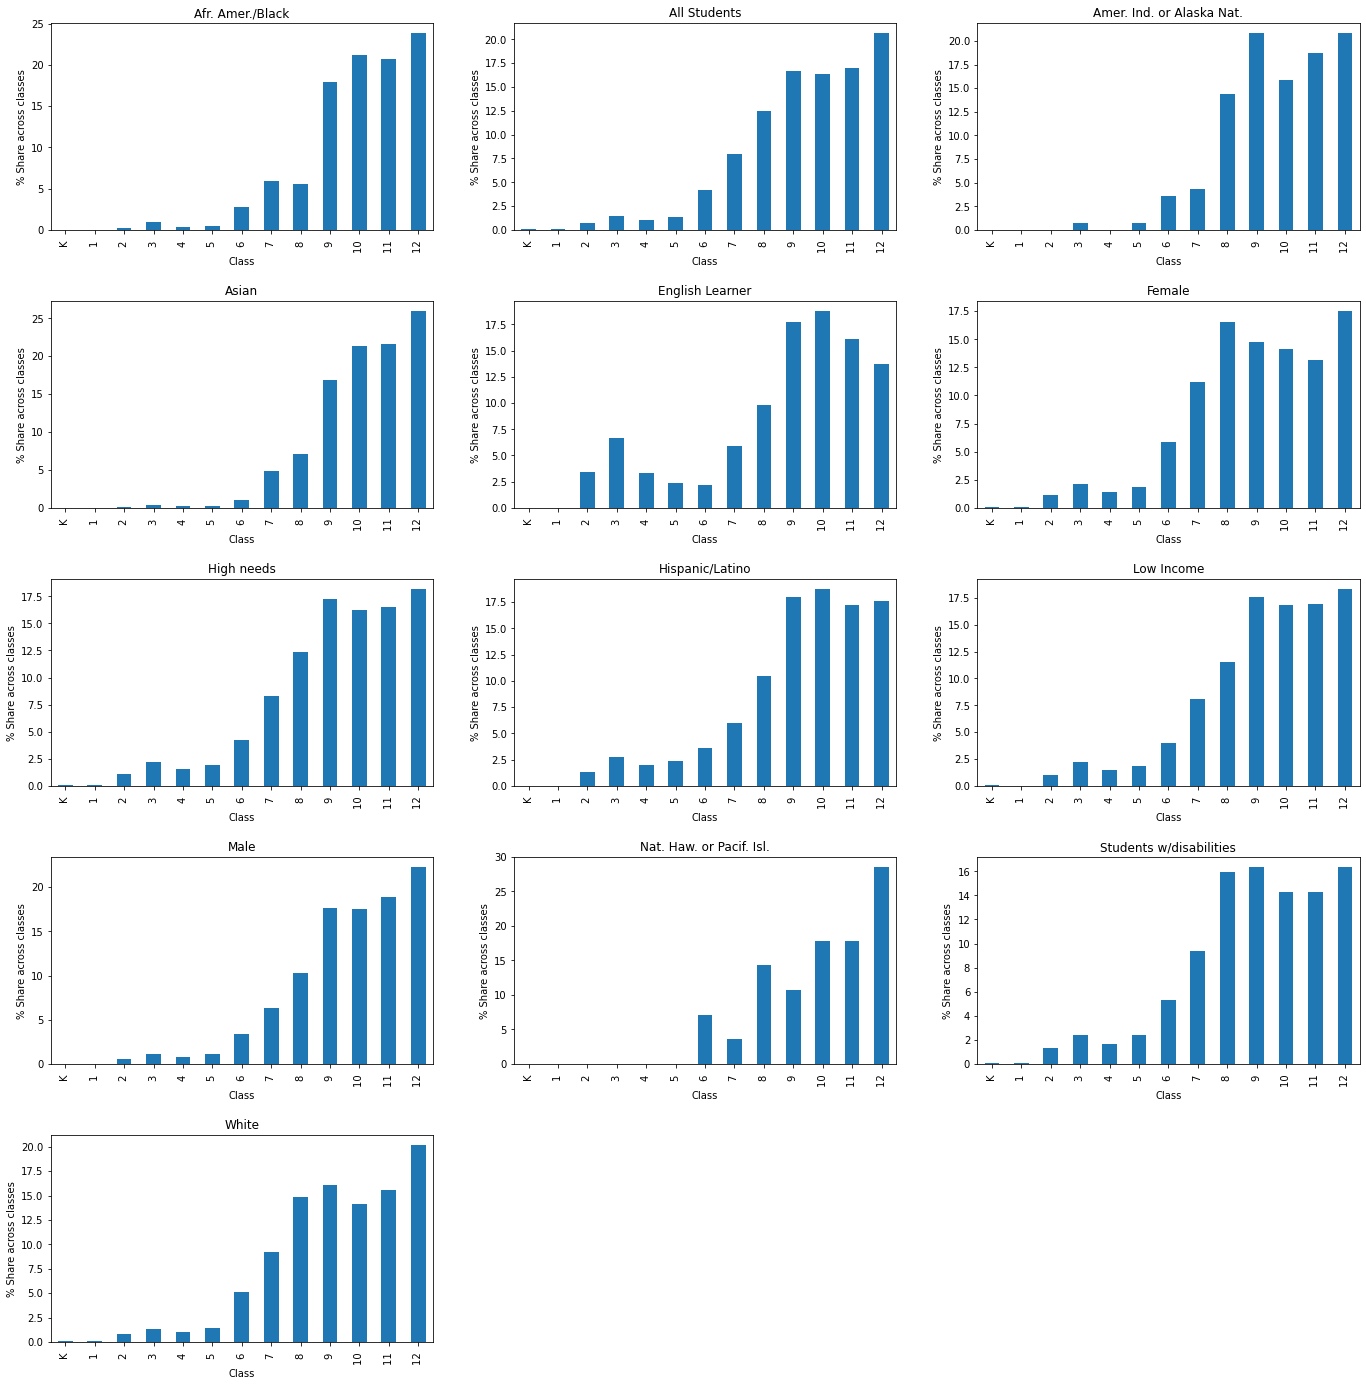

In [37]:
#within each group check the distribution of classes
col_list = []
for i in ['K']+list(range(1,13)):
    df_cs_g[str(i)+' '] = df_cs_g[str(i)]*100/df_cs_g['All Grades']
    col_list.append(str(i)+' ')

df_cs_g = df_cs_g.set_index('Student Group')

# Set up the figure size and grid for subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20)) # Adjust the size as needed
fig.tight_layout(pad=5.0)  # Adds padding between plots

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

for ind,i in enumerate(df_cs_g.index):
    df_cs_g_x = df_cs_g.loc[i, col_list]
    print(df_cs_g_x)
    df_cs_g_x.plot(kind = 'bar', ax=axes_flat[ind])
    axes_flat[ind].set_xlabel("Class")
    axes_flat[ind].set_ylabel("% Share across classes")
    axes_flat[ind].set_title(i)
    
for j in range(13, 15):
    fig.delaxes(axes_flat[j])
    
plt.show()

In [11]:
df_all_students = df[df['Student Group']=='All Students']

df_all_students_g = df_all_students.groupby('District Name')[['All Grades', 'Total Students']].sum().reset_index()

def get_cs_part(x):
    if len(df_districts[df_districts['Polygon_Town_mapping']==x])>0:
        x = df_districts['District Name'][df_districts['Polygon_Town_mapping']==x].iloc[0]
        a = 0
        b = 0
        for i in x:
            a = a+df_all_students_g['All Grades'][df_all_students_g['District Name']==i].iloc[0]
            b = b+df_all_students_g['Total Students'][df_all_students_g['District Name']==i].iloc[0]
        return a*100/b
    else:
        return None
        

df_polygon['CS Participation %'] = df_polygon['TOWN'].apply(lambda x:get_cs_part(x))
df_polygon

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,SUM_ACRES,SUM_SQUARE,POP2010,POPCH00_10,POPCH80_90,SHAPE_AREA,SHAPE_LEN,geometry,CS Participation %
0,LOWELL,160,93473,103439,105167,1728,C,4,25017,9298.780,14.531,106519,1352,9966,3.763066e+07,28403.664058,"POLYGON ((216431.383 935122.985, 217384.292 93...",1.817732
1,BEVERLY,30,34575,38195,39862,1667,C,1,25009,9863.262,15.411,39502,-360,3620,3.991521e+07,38638.706350,"MULTIPOLYGON (((247412.633 926932.675, 249132....",4.664980
2,GLOUCESTER,107,28092,28716,30273,1557,C,3,25009,17088.570,26.700,28789,-1484,624,6.915496e+07,159379.402958,"MULTIPOLYGON (((264186.562 935044.815, 264207....",3.551162
3,CHESTER,59,1182,1280,1308,28,T,4,25013,23784.924,37.164,1337,29,98,9.625415e+07,37542.272855,"POLYGON ((80255.212 900279.565, 84998.072 8998...",NaN
4,WINCHESTER,344,20021,20267,20810,543,T,2,25017,4062.159,6.347,21374,564,246,1.643902e+07,19080.564132,"POLYGON ((232109.422 913780.365, 231307.062 91...",3.658815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,EASTHAMPTON,87,16189,15537,15994,457,C,3,25015,8707.337,13.605,16053,59,-652,3.523734e+07,33943.997268,"POLYGON ((103344.752 893965.825, 104317.992 89...",6.312057
347,NORTH ANDOVER,210,21670,22792,27202,4410,T,4,25009,17738.929,27.716,28352,1150,1122,7.178508e+07,41127.590428,"POLYGON ((232049.362 942816.125, 233051.542 94...",NaN
348,NORTON,218,13156,14265,18036,3771,T,3,25005,18759.888,29.312,19031,995,1109,7.591856e+07,36981.001648,"POLYGON ((233072.343 860388.955, 231021.932 85...",2.747492
349,HAMPDEN,120,4665,4709,5171,462,T,4,25013,12568.904,19.639,5139,-32,44,5.086454e+07,29419.000427,"POLYGON ((128209.623 865065.755, 126153.943 86...",3.635621


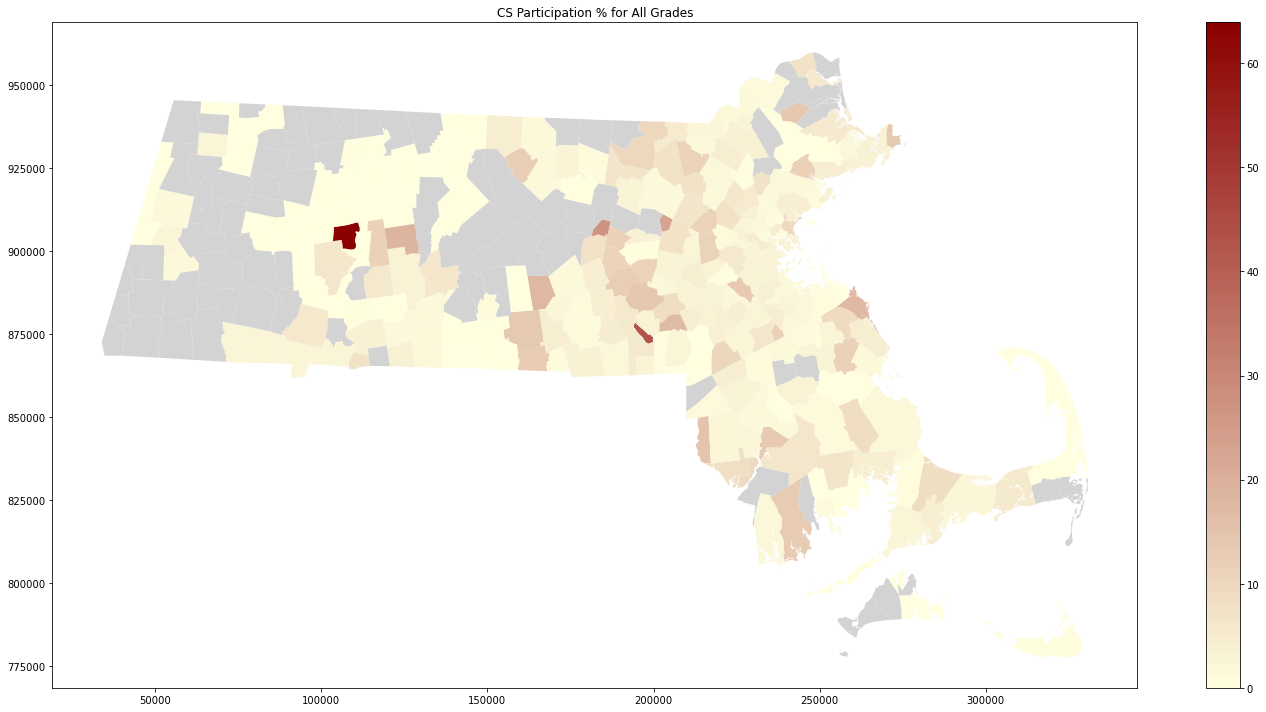

In [12]:
from matplotlib.colors import LinearSegmentedColormap

fig, ax = plt.subplots(figsize=(20, 10))
cmap = LinearSegmentedColormap.from_list('mycmap', ['lightyellow', 'darkred'])

# Specify the color for missing data (grey in this case)
missing_color = 'lightgray'

df_polygon.plot(column='CS Participation %',cmap=cmap,missing_kwds={'color': missing_color}, legend=True, ax=ax)

plt.title("CS Participation % for All Grades")
plt.tight_layout()
plt.show()

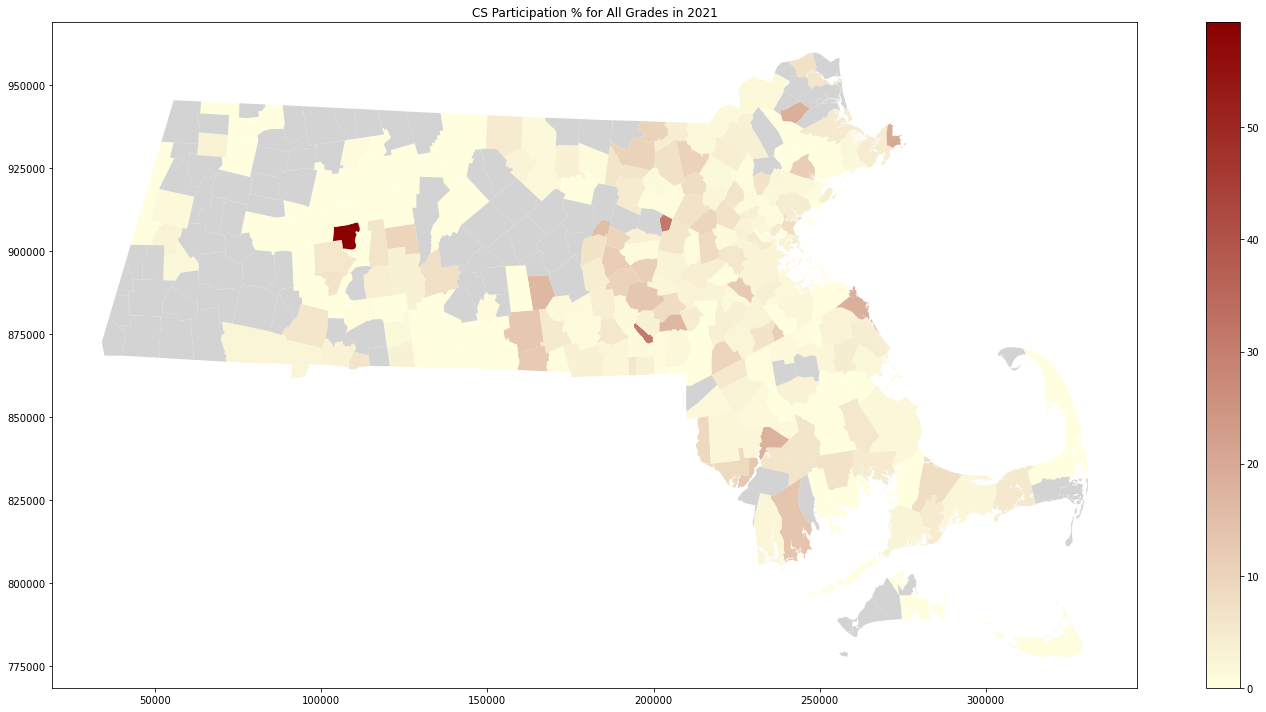

,TOWN,CS Participation %
305,HATFIELD,59.366755
68,MAYNARD,31.499556
7,HOPEDALE,31.034483
293,ROCKPORT,19.736842
87,SCITUATE,18.501420


In [13]:
#Plot only for 2021
df_all_students_g = df_all_students[df_all_students['Year']==2021].groupby('District Name')[['All Grades', 'Total Students']].sum().reset_index()

def get_cs_part(x):
    try:
        if len(df_districts[df_districts['Polygon_Town_mapping']==x])>0:
            x = df_districts['District Name'][df_districts['Polygon_Town_mapping']==x].iloc[0]
            a = 0
            b = 0
            for i in x:
                a = a+df_all_students_g['All Grades'][df_all_students_g['District Name']==i].iloc[0]
                b = b+df_all_students_g['Total Students'][df_all_students_g['District Name']==i].iloc[0]
            return a*100/b
        else:
            return None
    except:
        return None
        

df_polygon['CS Participation %'] = df_polygon['TOWN'].apply(lambda x:get_cs_part(x))

fig, ax = plt.subplots(figsize=(20, 10))
cmap = LinearSegmentedColormap.from_list('mycmap', ['lightyellow', 'darkred'])

# Specify the color for missing data (grey in this case)
missing_color = 'lightgray'

df_polygon.plot(column='CS Participation %',cmap=cmap,missing_kwds={'color': missing_color}, legend=True, ax=ax)

plt.title("CS Participation % for All Grades in 2021")
plt.tight_layout()
plt.show()

#print top 5 districts 
df_polygon[['TOWN','CS Participation %']].sort_values(by = 'CS Participation %', ascending= False).iloc[:5,:]


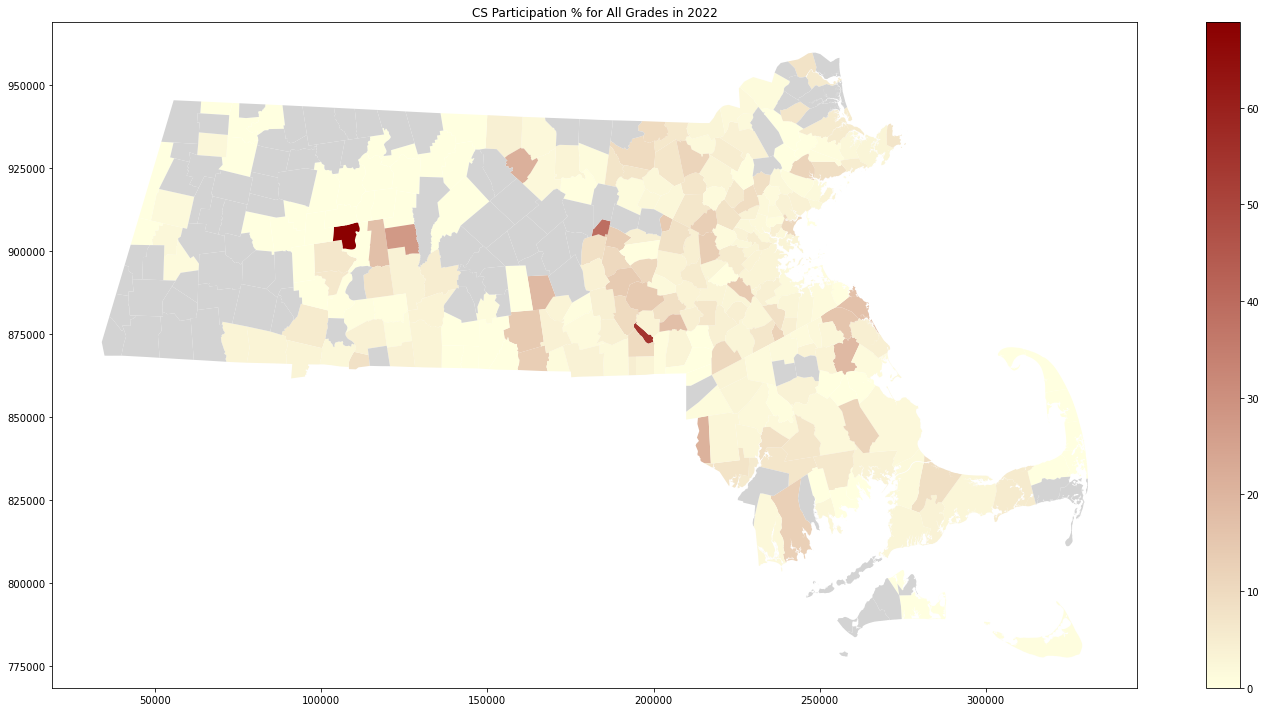

,TOWN,CS Participation %
305,HATFIELD,68.838527
7,HOPEDALE,54.813360
202,CLINTON,39.045093
213,PELHAM,27.446809
270,GARDNER,21.337580


In [14]:
#Plot only for 2021
df_all_students_g = df_all_students[df_all_students['Year']==2022].groupby('District Name')[['All Grades', 'Total Students']].sum().reset_index()

def get_cs_part(x):
    try:
        if len(df_districts[df_districts['Polygon_Town_mapping']==x])>0:
            x = df_districts['District Name'][df_districts['Polygon_Town_mapping']==x].iloc[0]
            a = 0
            b = 0
            for i in x:
                a = a+df_all_students_g['All Grades'][df_all_students_g['District Name']==i].iloc[0]
                b = b+df_all_students_g['Total Students'][df_all_students_g['District Name']==i].iloc[0]
            return a*100/b
        else:
            return None
    except:
        return None
        

df_polygon['CS Participation %'] = df_polygon['TOWN'].apply(lambda x:get_cs_part(x))

fig, ax = plt.subplots(figsize=(20, 10))
cmap = LinearSegmentedColormap.from_list('mycmap', ['lightyellow', 'darkred'])

# Specify the color for missing data (grey in this case)
missing_color = 'lightgray'

df_polygon.plot(column='CS Participation %',cmap=cmap,missing_kwds={'color': missing_color}, legend=True, ax=ax)

plt.title("CS Participation % for All Grades in 2022")
plt.tight_layout()
plt.show()

#print top 5 districts 
df_polygon[['TOWN','CS Participation %']].sort_values(by = 'CS Participation %', ascending= False).iloc[:5,:]
